In [183]:
import numpy as np
import pandas as pd

In [184]:
matches = pd.read_csv(r'IPL_Matches_Result_2008_2022.csv')
delivery = pd.read_csv(r'IPL_Ball_by_Ball_2008_2022.csv')

In [185]:
matches.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [186]:
matches.shape

(950, 20)

In [187]:
delivery.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [188]:
delivery.shape

(225954, 17)

In [189]:
#Every match both innings total run scored
total_score_df = delivery.groupby(['ID','innings']).sum()['total_run'].reset_index()
total_score_df

,ID,innings,total_run
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
1923,1312198,2,193
1924,1312199,1,157
1925,1312199,2,161
1926,1312200,1,130


In [190]:
total_score_df = total_score_df[total_score_df['innings'] == 1]
total_score_df

,ID,innings,total_run
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
1918,1304116,1,157
1920,1312197,1,188
1922,1312198,1,207
1924,1312199,1,157


In [191]:
#merging both dataset by id and total_run
match_df = matches.merge(total_score_df[['ID','total_run']], left_on ='ID', right_on ='ID')
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Deccan Chargers,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Daredevils,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Kings XI Punjab,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [192]:
match_df['Team1'].unique()

array(['Rajasthan Royals', 'Royal Challengers Bangalore',
       'Sunrisers Hyderabad', 'Delhi Capitals', 'Chennai Super Kings',
       'Gujarat Titans', 'Lucknow Super Giants', 'Kolkata Knight Riders',
       'Punjab Kings', 'Mumbai Indians', 'Kings XI Punjab',
       'Delhi Daredevils', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Rising Pune Supergiants', 'Pune Warriors', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

In [193]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Punjab Kings',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals',
    'Lucknow Super Giants',
    'Gujarat Titans'
]

In [194]:
match_df['Team1'] = match_df['Team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['Team2'] = match_df['Team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['Team1'] = match_df['Team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['Team2'] = match_df['Team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['Team1'] = match_df['Team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['Team2'] = match_df['Team2'].str.replace('Kings XI Punjab','Punjab Kings')

In [195]:
match_df = match_df[match_df['Team1'].isin(teams)]
match_df = match_df[match_df['Team2'].isin(teams)]

In [196]:
match_df.shape

(835, 21)

In [197]:
match_df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,total_run
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,130
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,157
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,207
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,...,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma,188
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,...,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,335986,Kolkata,2008-04-20,2007/08,4,Kolkata Knight Riders,Sunrisers Hyderabad,Eden Gardens,Deccan Chargers,bat,...,Kolkata Knight Riders,Wickets,5.0,NaN,DJ Hussey,"['WP Saha', 'BB McCullum', 'RT Ponting', 'SC G...","['AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxma...",BF Bowden,K Hariharan,110
946,335985,Mumbai,2008-04-20,2007/08,5,Mumbai Indians,Royal Challengers Bangalore,Wankhede Stadium,Mumbai Indians,bat,...,Royal Challengers Bangalore,Wickets,5.0,NaN,MV Boucher,"['L Ronchi', 'ST Jayasuriya', 'DJ Thornely', '...","['S Chanderpaul', 'R Dravid', 'LRPL Taylor', '...",SJ Davis,DJ Harper,165
947,335984,Delhi,2008-04-19,2007/08,3,Delhi Capitals,Rajasthan Royals,Feroz Shah Kotla,Rajasthan Royals,bat,...,Delhi Daredevils,Wickets,9.0,NaN,MF Maharoof,"['G Gambhir', 'V Sehwag', 'S Dhawan', 'MK Tiwa...","['T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif'...",Aleem Dar,GA Pratapkumar,129
948,335983,Chandigarh,2008-04-19,2007/08,2,Punjab Kings,Chennai Super Kings,"Punjab Cricket Association Stadium, Mohali",Chennai Super Kings,bat,...,Chennai Super Kings,Runs,33.0,NaN,MEK Hussey,"['K Goel', 'JR Hopes', 'KC Sangakkara', 'Yuvra...","['PA Patel', 'ML Hayden', 'MEK Hussey', 'MS Dh...",MR Benson,SL Shastri,240


In [198]:
match_df['method'] = match_df['method'].replace(np.nan, 0)

In [199]:
match_df['method'].value_counts()

method
0      820
D/L     15
Name: count, dtype: int64

In [200]:
#Removing all rain affected matches
match_df = match_df[match_df['method'] == 0 ]

In [201]:
match_df = match_df[['ID','City','WinningTeam','total_run','Team1','Team2']]

In [202]:
#Merging both datasets with respect to ID
delivery_df = match_df.merge(delivery,on = 'ID')
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extra_type,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,legbyes,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,wides,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


In [203]:
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Kings XI Punjab','Punjab Kings')

delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Kings XI Punjab','Punjab Kings')

In [204]:
# bowling Team col creation
delivery_df['BowlingTeam'] = delivery_df['BattingTeam']
delivery_df.loc[delivery_df['BattingTeam'] == delivery_df['Team1'], 'BowlingTeam'] = delivery_df['Team2']
delivery_df.loc[delivery_df['BattingTeam'] == delivery_df['Team2'], 'BowlingTeam'] = delivery_df['Team1']

In [205]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,batsman_run,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam
0,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,1,YBK Jaiswal,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
1,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,2,YBK Jaiswal,...,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
2,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,3,JC Buttler,...,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
3,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,4,YBK Jaiswal,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
4,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,1,0,5,YBK Jaiswal,...,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals,Gujarat Titans
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders


In [206]:
#Filtering for only second innings 
delivery_df = delivery_df[delivery_df['innings'] == 2]

In [207]:
delivery_df.shape

(95083, 23)

In [208]:
#Runs scored per ball
delivery_df['current_score'] = pd.to_numeric(delivery_df['total_run_y'], errors='coerce')#delivery_df.groupby('ID').cumsum()['total_run_y']

C:\conda_temp\ipykernel_21356\3389027055.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['current_score'] = pd.to_numeric(delivery_df['total_run_y'], errors='coerce')#delivery_df.groupby('ID').cumsum()['total_run_y']


In [209]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,extras_run,total_run_y,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,1,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,1,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1


In [210]:
#delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
#delivery_df['BattingTeam'] = delivery_df['BattingTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

#delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Delhi Daredevils','Delhi Capitals')
#delivery_df['WinningTeam'] = delivery_df['WinningTeam'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [211]:
delivery_df['total_run_x']

120       130
121       130
122       130
123       130
124       130
         ... 
196449    222
196450    222
196451    222
196452    222
196453    222
Name: total_run_x, Length: 95083, dtype: int64

In [212]:
delivery_df['current_score']

120       0
121       0
122       1
123       0
124       0
         ..
196449    1
196450    1
196451    0
196452    1
196453    0
Name: current_score, Length: 95083, dtype: int64

In [213]:
#total_runs_x - current_score = runs left
delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']

C:\conda_temp\ipykernel_21356\3639216939.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['runs_left'] = delivery_df['total_run_x'] - delivery_df['current_score']


In [214]:
#After every ball bowled how many balls are left 
delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])

C:\conda_temp\ipykernel_21356\814634355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['balls_left'] = 120 - (delivery_df['overs']*6 + delivery_df['ballnumber'])


In [215]:
delivery_df

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,119
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,118
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,117
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,116
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,31
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,30
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,29
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,29


In [216]:
delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_out'] = delivery_df['player_out'].astype('int')

#After every ball in a particular match how many wickets are fallen  
wickets_left = delivery_df.groupby('ID')['player_out'].transform(pd.Series.cumsum)#delivery_df.groupby('ID').cumsum()['player_out'].values

# wickets left
delivery_df['wickets_left'] = 10 - wickets_left
delivery_df

C:\conda_temp\ipykernel_21356\1885008539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_out'] = delivery_df['player_out'].fillna("0")
C:\conda_temp\ipykernel_21356\1885008539.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['player_out'] = delivery_df['player_out'].apply(lambda x:x if x == "0" else "1")
C:\conda_temp\ipykernel_21356\1885008539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,c

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,119,10
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,118,10
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,117,10
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,116,10
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,115,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,31,1
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,30,1
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,29,1
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,29,1


In [217]:
# CRR = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df

C:\conda_temp\ipykernel_21356\3863439022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,player_out,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr
120,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,1,WP Saha,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,119,10,0.000000
121,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,2,WP Saha,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,118,10,0.000000
122,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,3,WP Saha,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,1,129,117,10,2.000000
123,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,4,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,116,10,0.000000
124,1312200,Ahmedabad,Gujarat Titans,130,Rajasthan Royals,Gujarat Titans,2,0,5,Shubman Gill,...,0,NaN,NaN,Gujarat Titans,Rajasthan Royals,0,130,115,10,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196449,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,5,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,31,1,0.067416
196450,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,6,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,30,1,0.066667
196451,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,14,7,P Kumar,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,0,222,29,1,0.000000
196452,335982,Bangalore,Kolkata Knight Riders,222,Royal Challengers Bangalore,Kolkata Knight Riders,2,15,1,SB Joshi,...,0,NaN,NaN,Royal Challengers Bangalore,Kolkata Knight Riders,1,221,29,1,0.065934


In [218]:
# RRR = runs left/ over left
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']
delivery_df.sample(delivery_df.shape[0])

C:\conda_temp\ipykernel_21356\3340465671.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,kind,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr
90720,829815,Hyderabad,Mumbai Indians,113,Sunrisers Hyderabad,Mumbai Indians,2,10,7,LMP Simmons,...,NaN,NaN,Mumbai Indians,Sunrisers Hyderabad,1,112,53,10,0.089552,12.679245
31018,1254063,Chennai,Royal Challengers Bangalore,149,Royal Challengers Bangalore,Sunrisers Hyderabad,2,6,4,MK Pandey,...,NaN,NaN,Sunrisers Hyderabad,Royal Challengers Bangalore,0,149,80,9,0.000000,11.175000
34411,1216535,NaN,Mumbai Indians,110,Delhi Capitals,Mumbai Indians,2,4,1,Q de Kock,...,NaN,NaN,Mumbai Indians,Delhi Capitals,1,109,95,10,0.240000,6.884211
67824,1136593,Kolkata,Kolkata Knight Riders,177,Chennai Super Kings,Kolkata Knight Riders,2,3,5,RV Uthappa,...,NaN,NaN,Kolkata Knight Riders,Chennai Super Kings,0,177,97,9,0.000000,10.948454
40955,1216523,Abu Dhabi,Kolkata Knight Riders,164,Kolkata Knight Riders,Punjab Kings,2,17,2,N Pooran,...,bowled,NaN,Punjab Kings,Kolkata Knight Riders,0,164,16,8,0.000000,61.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68302,1136590,Pune,Chennai Super Kings,211,Chennai Super Kings,Delhi Capitals,2,1,5,PP Shaw,...,caught,RA Jadeja,Delhi Capitals,Chennai Super Kings,0,211,109,9,0.000000,11.614679
97622,829751,Mumbai,Mumbai Indians,157,Mumbai Indians,Sunrisers Hyderabad,2,18,3,P Kumar,...,bowled,NaN,Sunrisers Hyderabad,Mumbai Indians,0,157,9,3,0.000000,104.666667
151786,501223,Delhi,Delhi Capitals,231,Delhi Capitals,Punjab Kings,2,7,1,SE Marsh,...,NaN,NaN,Punjab Kings,Delhi Capitals,1,230,77,9,0.139535,17.922078
193142,335996,Bangalore,Chennai Super Kings,178,Royal Challengers Bangalore,Chennai Super Kings,2,15,6,V Kohli,...,NaN,NaN,Royal Challengers Bangalore,Chennai Super Kings,4,174,24,6,0.250000,43.500000


In [219]:
def result(row):
    return 1 if row['BattingTeam'] == row['WinningTeam'] else 0

In [220]:
delivery_df['result'] = delivery_df.apply(result,axis=1)
final_df = delivery_df[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr','result']]

C:\conda_temp\ipykernel_21356\1751967604.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delivery_df['result'] = delivery_df.apply(result,axis=1)


In [221]:
final_df.sample(final_df.shape[0])

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
39671,Rajasthan Royals,Delhi Capitals,NaN,160,65,8,161,0.109091,14.769231,0
174967,Rajasthan Royals,Sunrisers Hyderabad,Kimberley,166,95,8,166,0.000000,10.484211,0
88904,Mumbai Indians,Kolkata Knight Riders,Kolkata,182,62,9,187,0.517241,17.612903,1
26712,Mumbai Indians,Rajasthan Royals,Delhi,165,35,8,171,0.423529,28.285714,1
168603,Royal Challengers Bangalore,Punjab Kings,Bangalore,197,91,10,203,1.241379,12.989011,1
...,...,...,...,...,...,...,...,...,...,...
109655,Royal Challengers Bangalore,Punjab Kings,Bangalore,197,83,7,198,0.162162,14.240964,0
163748,Mumbai Indians,Punjab Kings,Mumbai,159,97,10,163,1.043478,9.835052,1
129191,Chennai Super Kings,Punjab Kings,Chandigarh,138,75,10,138,0.000000,11.040000,1
107434,Delhi Capitals,Rajasthan Royals,Ahmedabad,200,108,10,201,0.500000,11.111111,0


In [222]:
final_df.sample()

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr,result
184555,Chennai Super Kings,Sunrisers Hyderabad,Hyderabad,147,105,10,147,0.0,8.4,1


In [223]:
final_df.isnull().sum()

BattingTeam        0
BowlingTeam        0
City            6012
runs_left          0
balls_left         0
wickets_left       0
total_run_x        0
crr                0
rrr                0
result             0
dtype: int64

In [224]:
final_df.dropna(inplace=True)

C:\conda_temp\ipykernel_21356\2709626079.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [225]:
final_df = final_df[final_df['balls_left'] !=0 ]

In [226]:
#Model

In [227]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [228]:
X_train

,BattingTeam,BowlingTeam,City,runs_left,balls_left,wickets_left,total_run_x,crr,rrr
142034,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,194,50,6,195,0.085714,23.280000
128976,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,153,56,8,154,0.093750,16.392857
174516,Mumbai Indians,Punjab Kings,Centurion,119,73,8,119,0.000000,9.780822
67198,Sunrisers Hyderabad,Delhi Capitals,Hyderabad,162,6,7,163,0.052632,162.000000
119915,Mumbai Indians,Sunrisers Hyderabad,Mumbai,177,26,6,178,0.063830,40.846154
...,...,...,...,...,...,...,...,...,...
53843,Mumbai Indians,Royal Challengers Bangalore,Mumbai,170,85,10,171,0.171429,12.000000
164498,Chennai Super Kings,Rajasthan Royals,Ahmedabad,176,81,9,177,0.153846,13.037037
116131,Rajasthan Royals,Sunrisers Hyderabad,Abu Dhabi,127,62,7,133,0.620690,12.290323
10821,Kolkata Knight Riders,Rajasthan Royals,Mumbai,217,22,5,217,0.000000,59.181818


In [229]:
#To convert string to int
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False, drop='first'),['BattingTeam','BowlingTeam','City'])
]
,remainder='passthrough')

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [231]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver = 'liblinear'))
])

#pipe = OneHotEncoder(handle_unknown="infrequent")

In [232]:
#pipe = Pipeline(steps=[
#    ('step1',trf),
#    ('step2',RandomForestClassifier())
#])

In [233]:
pipe.fit(X_train,y_train)

c:\Users\Jai kattimani\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['BattingTeam', 'BowlingTeam',
                                                   'City'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [234]:
y_pred = pipe.predict(X_test)

In [235]:
#Logistic 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7863580038301228

In [236]:
#RandomForectClassifier
#pipe.predict_proba(X_test)[1]

In [237]:
pipe.predict_proba(X_test)[10]

array([0.45748028, 0.54251972])

In [238]:
def match_summary(row):
    print("Batting Team-" + row['BattingTeam'] + " | Bowling Team-" + row['BowlingTeam'] + " | Target- " + str(row['total_run_x']))
    

In [239]:
delivery_df[delivery_df['ID']== 1312199]

,ID,City,WinningTeam,total_run_x,Team1,Team2,innings,overs,ballnumber,batter,...,fielders_involved,BattingTeam,BowlingTeam,current_score,runs_left,balls_left,wickets_left,crr,rrr,result
360,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,1,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,119,10,0.000000,7.915966,1
361,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,2,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,118,10,0.000000,7.983051,1
362,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,3,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,6,151,117,10,12.000000,7.743590,1
363,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,4,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,4,153,116,10,6.000000,7.913793,1
364,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,0,5,YBK Jaiswal,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,0,157,115,10,0.000000,8.191304,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,3,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,1,156,15,7,0.057143,62.400000,1
465,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,4,SO Hetmyer,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,1,156,14,7,0.056604,66.857143,1
466,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,5,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,2,155,13,7,0.112150,71.538462,1
467,1312199,Ahmedabad,Rajasthan Royals,157,Royal Challengers Bangalore,Rajasthan Royals,2,17,6,JC Buttler,...,NaN,Rajasthan Royals,Royal Challengers Bangalore,1,156,12,7,0.055556,78.000000,1


In [240]:
def match_progression(x_df,ID,pipe):
    match = x_df[x_df['ID'] == ID]
    print(match)
    match = match[(match['ballnumber'] == 6)]
    temp_df = match[['BattingTeam','BowlingTeam','City','runs_left','balls_left','wickets_left','total_run_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_run_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets_left'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [241]:
ball_by_ball_data = delivery_df
temp_df,target = match_progression(ball_by_ball_data,548343,pipe)
temp_df


            ID     City   WinningTeam  total_run_x                Team1   
139062  548343  Chennai  Punjab Kings          156  Chennai Super Kings  \
139063  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139064  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139065  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139066  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
...        ...      ...           ...          ...                  ...   
139180  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139181  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139182  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139183  548343  Chennai  Punjab Kings          156  Chennai Super Kings   
139184  548343  Chennai  Punjab Kings          156  Chennai Super Kings   

               Team2  innings  overs  ballnumber           batter  ...   
139062  Punjab Kings     

,end_of_over,runs_after_over,wickets_in_over,lose,win
139067,1,0,0,45.0,55.0
139073,2,4,0,33.6,66.4
139079,3,2,0,26.4,73.6
139085,4,-6,0,28.9,71.1
139091,5,1,0,23.3,76.7
139097,6,-1,1,37.8,62.2
139103,7,1,0,31.2,68.8
139109,8,-1,1,47.5,52.5
139115,9,0,0,41.8,58.2
139121,10,0,0,36.2,63.8


Text(0.5, 1.0, 'Target-156')

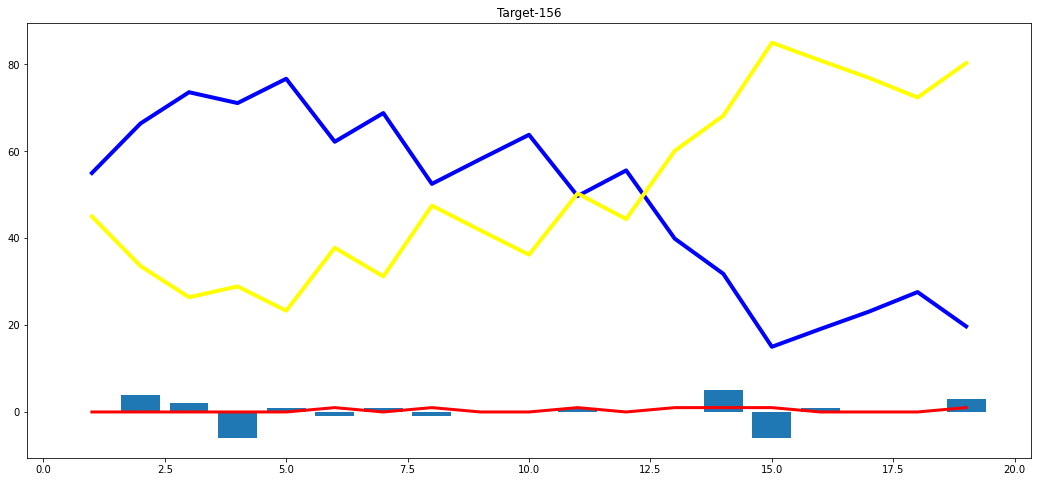

In [242]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='red',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='blue',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='yellow',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [243]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Punjab Kings',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [244]:
delivery_df['City'].unique()

array(['Ahmedabad', 'Kolkata', 'Mumbai', 'Navi Mumbai', 'Pune', 'Dubai',
       'Sharjah', 'Abu Dhabi', 'Delhi', 'Chennai', nan, 'Hyderabad',
       'Visakhapatnam', 'Chandigarh', 'Bengaluru', 'Jaipur', 'Indore',
       'Bangalore', 'Raipur', 'Ranchi', 'Cuttack', 'Dharamsala', 'Nagpur',
       'Johannesburg', 'Centurion', 'Durban', 'Bloemfontein',
       'Port Elizabeth', 'Kimberley', 'East London', 'Cape Town'],
      dtype=object)

In [245]:
#import pickle
# pickle.dump(pipe,open('pipe.pkl','wb'))
#from joblib import dump # type: ignore
#dump(pipe, 'pipenew.joblib') 